In [139]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Question 1

In [140]:
import seaborn as sns
data = pd.read_csv('./Iris_PA02.csv')
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Task 1
**Identify two attributes from the dataset that are most suitable for performing cluster analysis.**

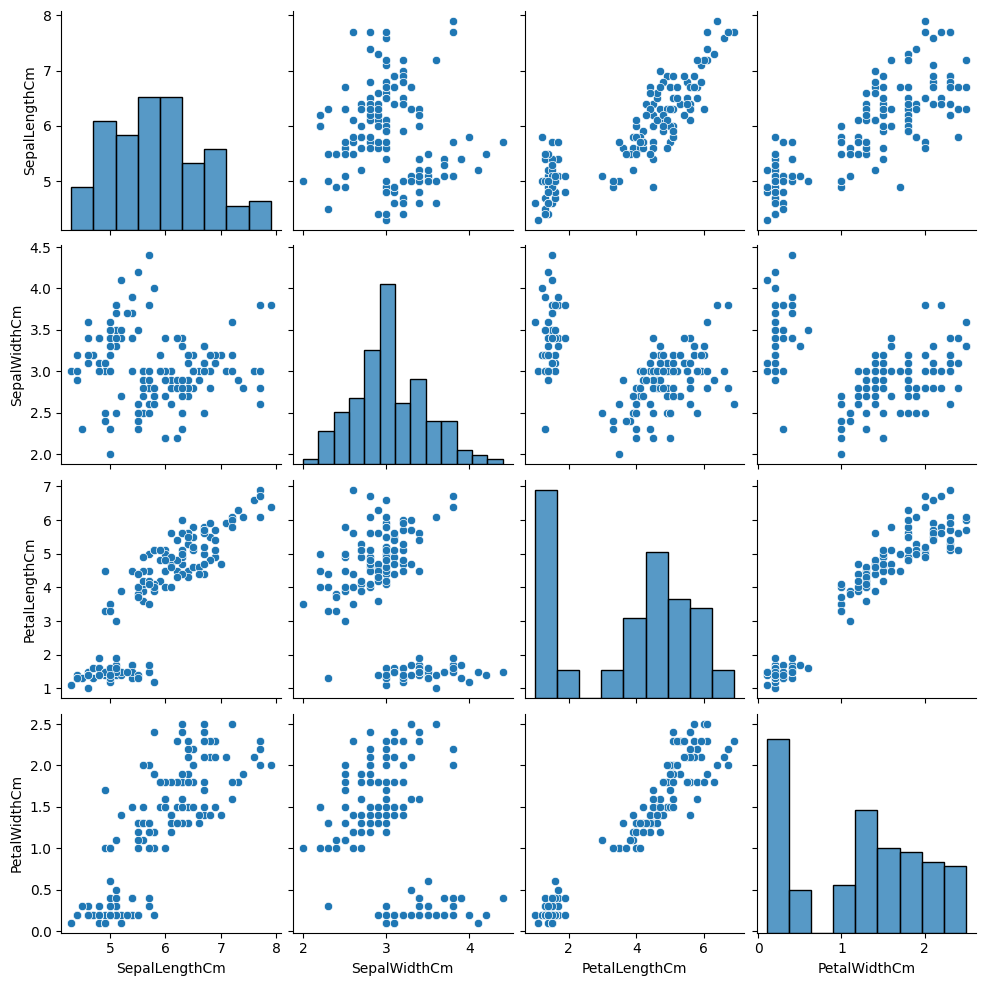

In [141]:
sns.pairplot(data)

# Task 2
**Perform cluster analysis using the k-Means, Agglomerative, and DBSCAN clustering
methods on the dataset.**

In [142]:
# Clustering setup
import matplotlib.colors as mcolors
# Declaring variables to be used by all clustering methods 
# (change here, clustering changes on all algorithms)
colors = ['red',  'yellow','green', 'cyan']  # other colors: 'blue', 'purple', 'pink', 'orange'
number_of_clusters = 3
figure_size = (5, 5)

attributes = ['SepalLengthCm', 'SepalWidthCm']
attribute_labels = ["Sepal Length (cm)", "Sepal Width (cm)"]

# Filtering data
data_to_cluster = data[attributes]
data_to_cluster

def plotData(label: str, title='SEPAL DATA'):
    plt.figure(figsize=figure_size)
    plt.scatter(data[attributes[0]], data[attributes[1]], c=data[label],  cmap=mcolors.ListedColormap(colors), s=15)
    plt.title(title)
    plt.xlabel(attribute_labels[0])
    plt.ylabel(attribute_labels[1])


### K-Means Clustering

In [143]:
# Cluster data
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=number_of_clusters, random_state=0)
kmeans.fit(data_to_cluster)
data['KMeans_Labels'] = kmeans.labels_

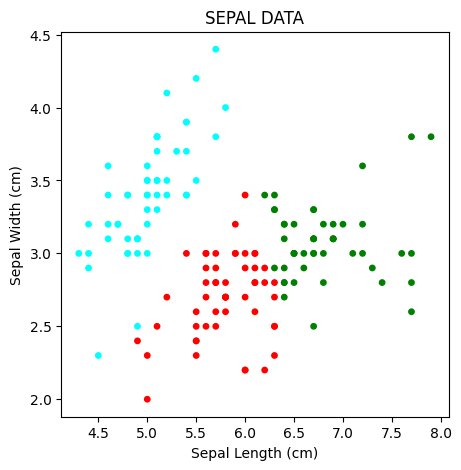

In [144]:
# Plot KMeans clusters
plotData('KMeans_Labels')

### Agglomerative Clustering

In [145]:
# Cluster Data
from sklearn.cluster import AgglomerativeClustering

agglo = AgglomerativeClustering(n_clusters=number_of_clusters)
agglo.fit(data_to_cluster)
data['Agglo_Labels'] = agglo.labels_

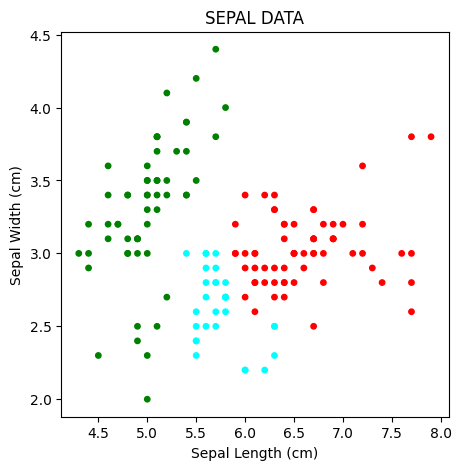

In [146]:
# Plot Clusters
plotData('Agglo_Labels')

### DBSCAN

In [147]:
# Cluster Data
from sklearn.cluster import DBSCAN
density_scan = DBSCAN(eps=.15, min_samples=5)
density_scan.fit(data_to_cluster)
data['DBSCAN_Labels'] = density_scan.labels_

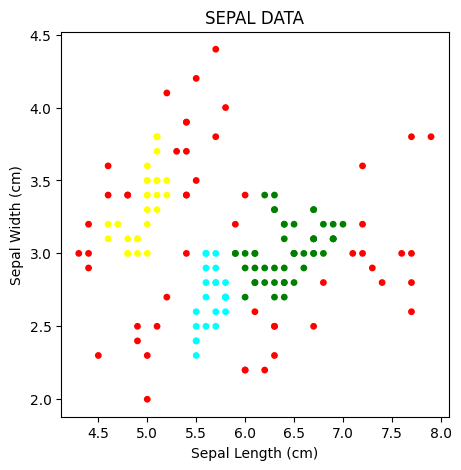

In [148]:
# Plot Clusters
plotData('DBSCAN_Labels')

# (Red cluster is outliers)

Text(0, 0.5, 'Sepal Width (cm)')

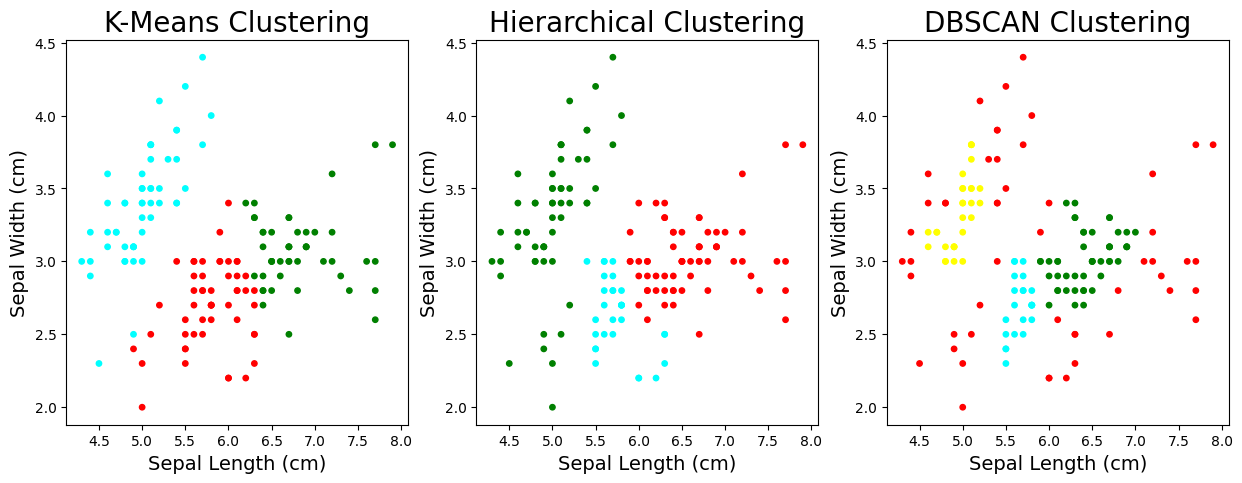

In [149]:
# Plot all 3 graphs in one image
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(figure_size[0] * 3, figure_size[1]))

title_fontsize = 20
label_fontsize = 14

ax[0].scatter(data[attributes[0]], data[attributes[1]], c=data['KMeans_Labels'],  cmap=mcolors.ListedColormap(colors), s=15)
ax[0].set_title('K-Means Clustering', fontsize=title_fontsize)
ax[0].set_xlabel(attribute_labels[0], fontsize=label_fontsize)
ax[0].set_ylabel(attribute_labels[1],fontsize=label_fontsize)

ax[1].scatter(data[attributes[0]], data[attributes[1]], c=data['Agglo_Labels'],  cmap=mcolors.ListedColormap(colors), s=15)
ax[1].set_title('Hierarchical Clustering', fontsize=title_fontsize)
ax[1].set_xlabel(attribute_labels[0], fontsize=label_fontsize)
ax[1].set_ylabel(attribute_labels[1],fontsize=label_fontsize)

ax[2].scatter(data[attributes[0]], data[attributes[1]], c=data['DBSCAN_Labels'],  cmap=mcolors.ListedColormap(colors), s=15)
ax[2].set_title('DBSCAN Clustering', fontsize=title_fontsize)
ax[2].set_xlabel(attribute_labels[0], fontsize=label_fontsize)
ax[2].set_ylabel(attribute_labels[1],fontsize=label_fontsize)

# Question 2
Prove that the DBSCAN clustering method works best on the [below] data over k-Means and Agglomerative clustering methods.

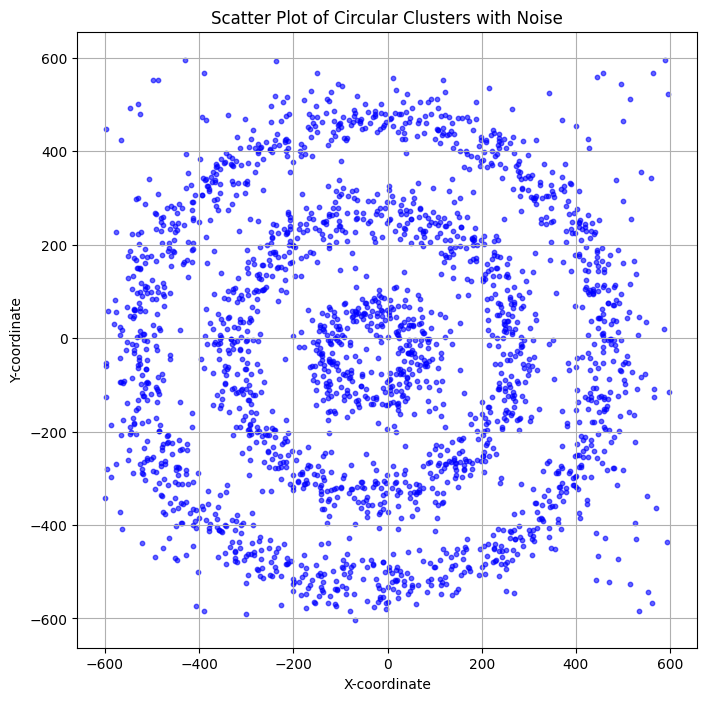

In [150]:
# Function to generate points in a circle with added noise
def PointsInCircle(r, n=100):
    return [(math.cos(2 * math.pi / n * x) * r + np.random.normal(-30, 30),
             math.sin(2 * math.pi / n * x) * r + np.random.normal(-30, 30)) for x in range(1, n + 1)]

# Creating circular clusters and adding noise
data1 = pd.DataFrame(PointsInCircle(500, 1000))
data2 = pd.DataFrame(PointsInCircle(300, 700))
data3 = pd.DataFrame(PointsInCircle(100, 300))
data = pd.concat([data1, data2, data3])
noise = pd.DataFrame([(np.random.randint(-600, 600), np.random.randint(-600, 600)) for i in range(300)])
data = pd.concat([data, noise])
data.rename(columns={0: "0", 1: "1"}, inplace=True)

# Scatter plot of the circular clusters with noise
plt.figure(figsize=(8, 8))
plt.scatter(data["0"], data["1"], s=10, alpha=0.6, color="b")
plt.xlabel("X-coordinate")
plt.ylabel("Y-coordinate")
plt.title("Scatter Plot of Circular Clusters with Noise")
plt.grid(True)
plt.show()


In [151]:
# setup
attributes = ['0', '1']
attribute_labels = ['X-coordinate', 'Y-coordinate']

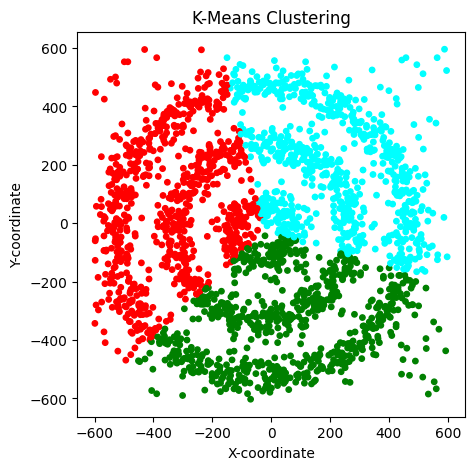

In [152]:
# Kmeans
kmeans.fit(data[attributes])
data['KMeans_Labels'] = kmeans.labels_
plotData('KMeans_Labels', title='K-Means Clustering')

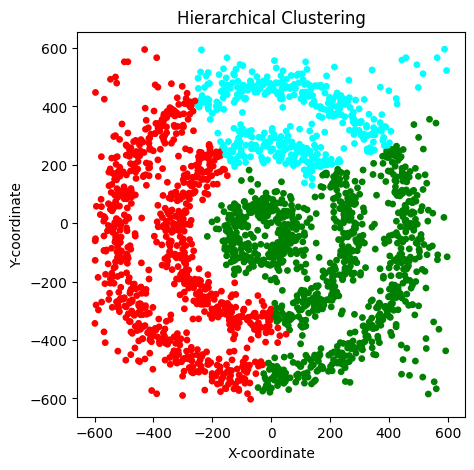

In [153]:
# Agglomerative
agglo.fit(data[attributes])
data['Agglo_Labels'] = agglo.labels_
plotData('Agglo_Labels', title='Hierarchical Clustering')

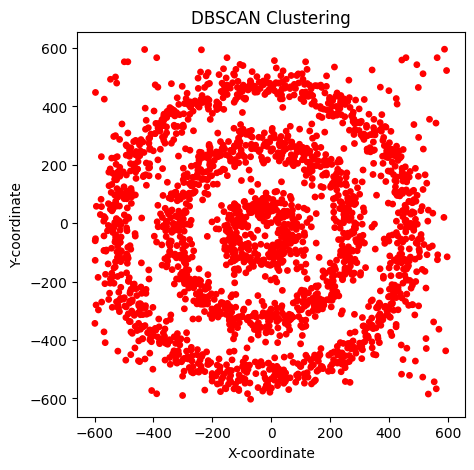

In [154]:
# DBSCAN

density_scan = DBSCAN(eps=0.75, min_samples=300) # DBSCAN needs to be re-set up to fit the scenario
density_scan.fit(data[attributes])
data['DBSCAN_Labels'] = density_scan.labels_
plotData('DBSCAN_Labels', title='DBSCAN Clustering')